# Programming Project 1 analysis using EDA tools

### Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load the dataset and save it to a dataframe named 'df'
df=pd.read_csv('DS 160 Individual Project 1.csv')
df.head()

,Initials,Date,Course ID,Time (m),Summary
0,BH,1/9/2023,DS 160,10,Set up this excel file for the individual proj...
1,BH,1/10/2023,ENVS 111,30,Group work
2,BH,1/10/2023,ENGL 200,20,Reading poems
3,BH,1/10/2023,ENVS 111 Lab,90,Lab 1 work
4,BH,1/11/2023,BUSA 203,50,Study notes from first day


### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
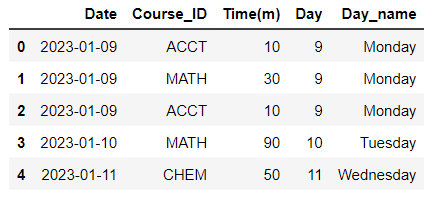

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Initials   46 non-null     object
 1   Date       46 non-null     object
 2   Course ID  46 non-null     object
 3   Time (m)   46 non-null     int64 
 4   Summary    46 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.9+ KB


In [4]:
# Is there any column you want to drop? If yes which column and why?
#No, bevcause all of the columns have all the entries and none are missing data points

In [5]:
# Convert the date column to datetime
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Initials   46 non-null     object        
 1   Date       46 non-null     datetime64[ns]
 2   Course ID  46 non-null     object        
 3   Time (m)   46 non-null     int64         
 4   Summary    46 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.9+ KB


In [6]:
# Calculate the day of the month and create a new column named 'Day'
df['Day']=df['Date'].dt.day
df.head()

,Initials,Date,Course ID,Time (m),Summary,Day
0,BH,2023-01-09,DS 160,10,Set up this excel file for the individual proj...,9
1,BH,2023-01-10,ENVS 111,30,Group work,10
2,BH,2023-01-10,ENGL 200,20,Reading poems,10
3,BH,2023-01-10,ENVS 111 Lab,90,Lab 1 work,10
4,BH,2023-01-11,BUSA 203,50,Study notes from first day,11


In [7]:
# Create a new column called Day_name using  .dt.day_name()
df['Day_name']= df['Date'].dt.day_name()
df.head()

,Initials,Date,Course ID,Time (m),Summary,Day,Day_name
0,BH,2023-01-09,DS 160,10,Set up this excel file for the individual proj...,9,Monday
1,BH,2023-01-10,ENVS 111,30,Group work,10,Tuesday
2,BH,2023-01-10,ENGL 200,20,Reading poems,10,Tuesday
3,BH,2023-01-10,ENVS 111 Lab,90,Lab 1 work,10,Tuesday
4,BH,2023-01-11,BUSA 203,50,Study notes from first day,11,Wednesday


### Answer the questions

In [8]:
# What is the average time you have spend for learning?
print(df['Time (m)'].mean())

21.73913043478261


In [9]:
# Display all of the entries where you have spent more than the average time to learn 
df.loc[(df['Time (m)']>21.74)]

,Initials,Date,Course ID,Time (m),Summary,Day,Day_name
1,BH,2023-01-10,ENVS 111,30,Group work,10,Tuesday
3,BH,2023-01-10,ENVS 111 Lab,90,Lab 1 work,10,Tuesday
4,BH,2023-01-11,BUSA 203,50,Study notes from first day,11,Wednesday
6,BH,2023-01-12,ENGL 200,30,Reading poems,12,Thursday
7,BH,2023-01-13,BUSA 203,30,Quiz,13,Friday
8,BH,2023-01-14,ENGL 200,30,Reading poems,14,Saturday
9,BH,2023-01-17,ENVS 111,30,Lab 2,17,Tuesday
29,BH,2023-02-02,BUSA 203,30,Study for exam 1,2,Thursday
31,BH,2023-02-04,ACCT 212,30,Exam 1 study,4,Saturday
32,BH,2023-02-05,ACCT 212,30,Exam 1 study,5,Sunday


In [10]:
# Which course you have spent the maximum time to prepare?
df['Time (m)'].max()
df['Course ID'].max()
# The course I have spent the most time on is the ENVS 111 Lab

'ENVS 111 Lab'

In [11]:
# Which day of the week you sepent most of the time?
df['Day_name'].max()
# The day of the week I have spent the most time working on classwork is Wednesday

'Wednesday'

### Investigate the distribution of Time, adding the mean. How the data distributed?
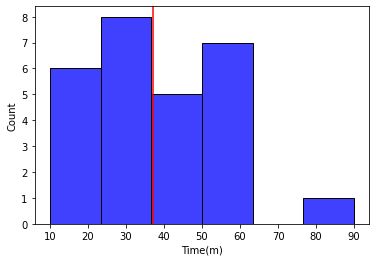

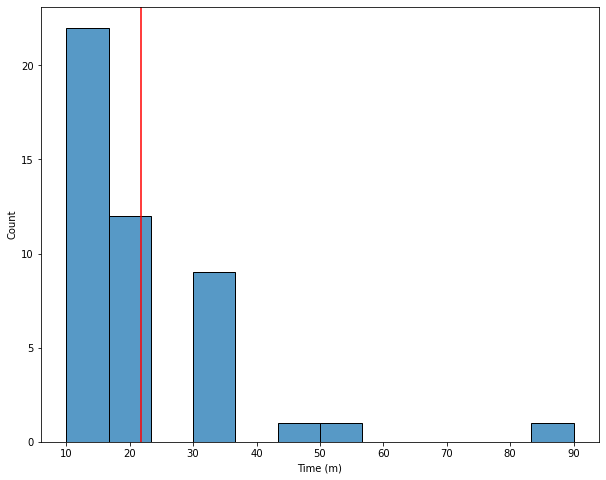

In [12]:
plt.figure(figsize=(10,8))

hist_plot=sns.histplot(x='Time (m)',
                       data=df)

mean=df['Time (m)'].mean()

plt.axvline(mean, color='red')

plt.show()

In [13]:
# My data is skewed right, with my average time spent at just over 20 minutes, with most of my data points between 10 and 20 minutes

### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
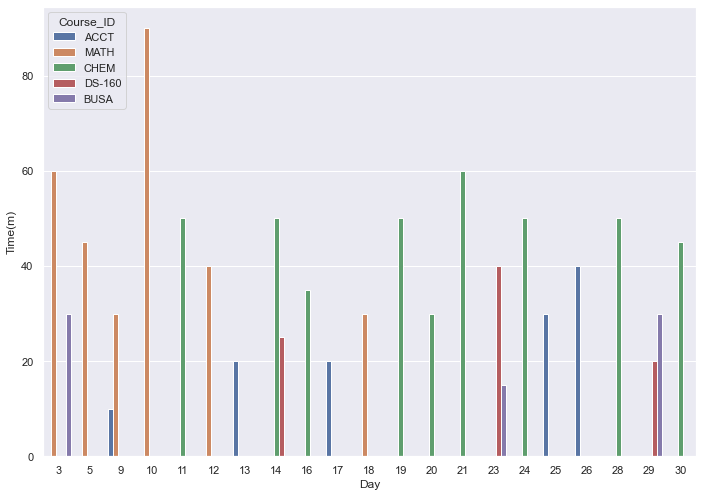

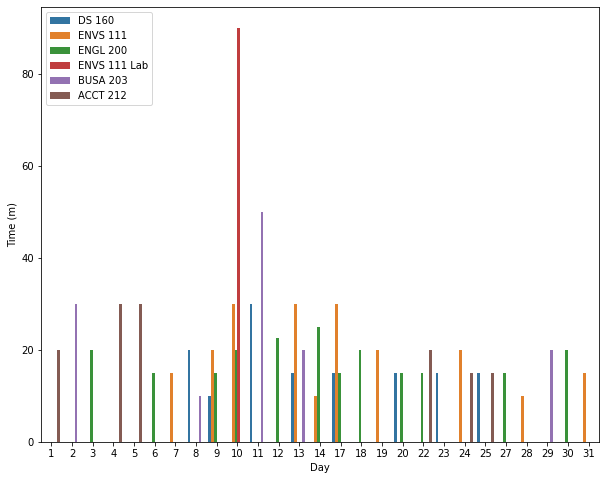

In [14]:
plt.figure(figsize=(10,8))

bar_plot_time_day=sns.barplot(x='Day',
                     y='Time (m)',
                     data=df,
                     ci=False,
                     hue='Course ID')

plt.legend(loc=2)

In [15]:
# I spent little time on most assignments for most of my courses, sticking to the 15 to 30 minute range.
# However, there are a few cases where I spent a lot of time on an assignment, especially for ENVS 111 Lab

### Investigate the measure of dispersion (table and plot) of time column.
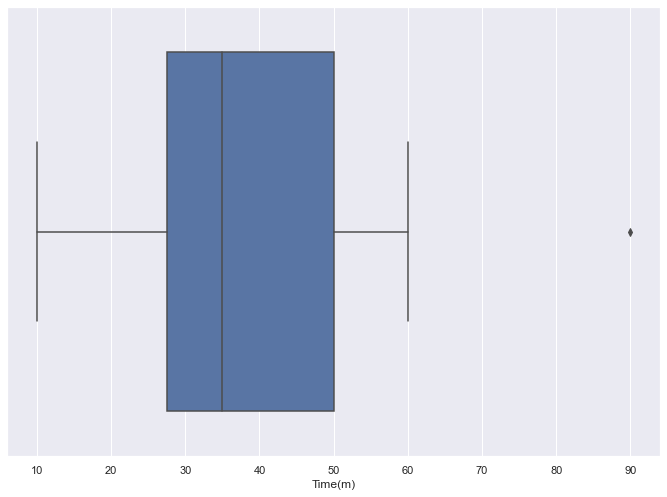

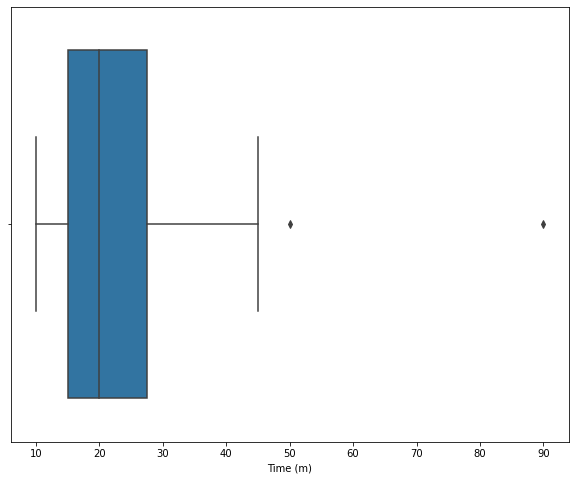

In [16]:
plt.figure(figsize=(10,8))

box_plot_time=sns.boxplot(x=df['Time (m)'])

In [17]:
# For the most part, I spent between 15 and 27 minutes on each assignment, with two outliers around 50 minutes and 90 minutes

### Investigate the the distribution of time by Day_name
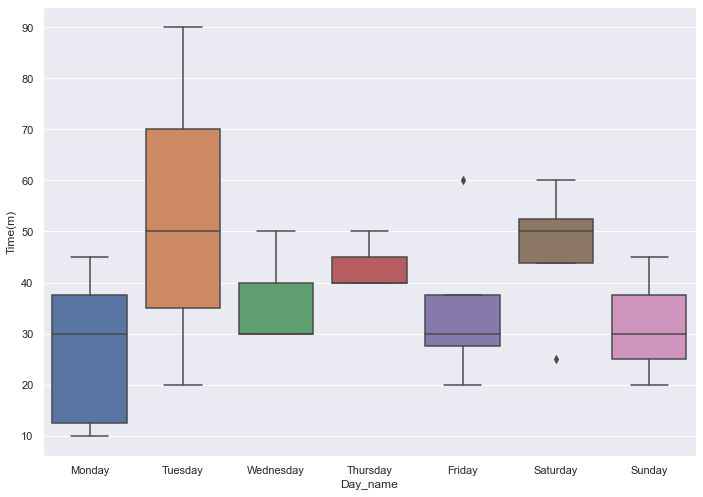

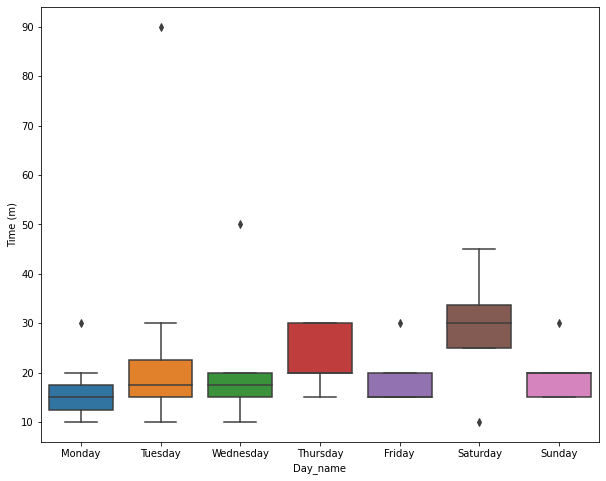

In [18]:
plt.figure(figsize=(10,8))

box_plot_day=sns.boxplot(x='Day_name',
                    y='Time (m)',
                    data=df)

In [19]:
# I stayed consistent from Monday to Wednesday, spent a little more time on assignments on Thursday and Saturday, and less time on Friday and Sunday

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
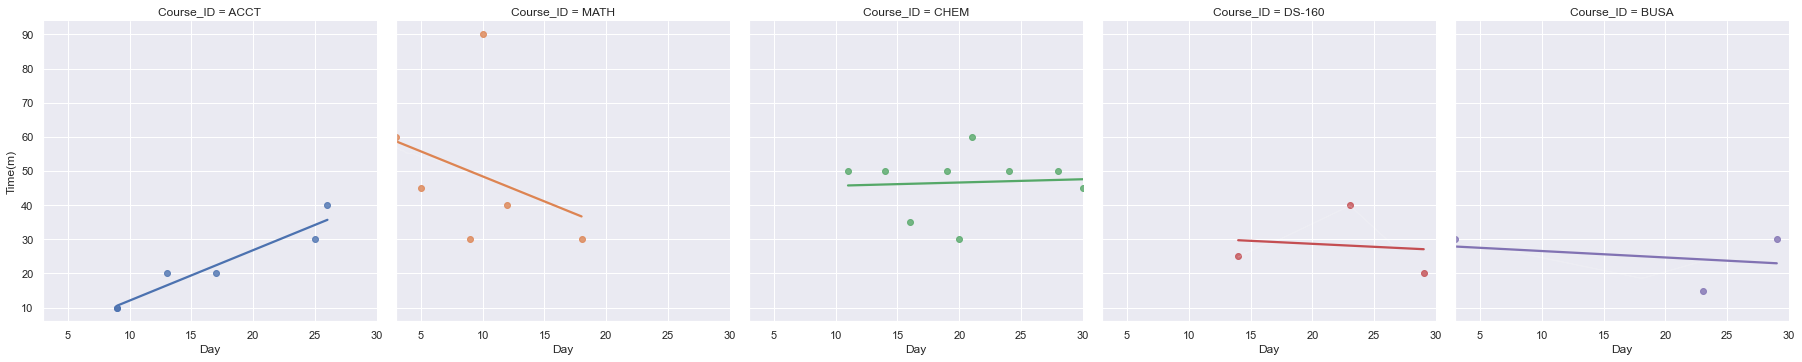

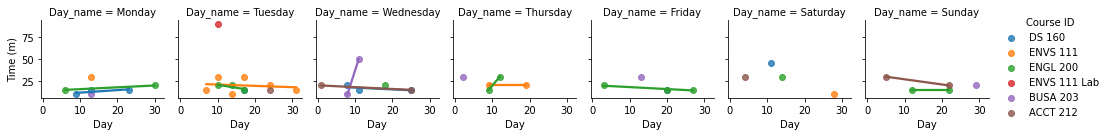

In [20]:
lm_plot=sns.lmplot(x='Day',
                   y='Time (m)',
                   data=df,
                   hue='Course ID',
                   ci=False,
                  col='Day_name',
                  height=2)



### Create a pair plot of Day and Time and add course id as hue
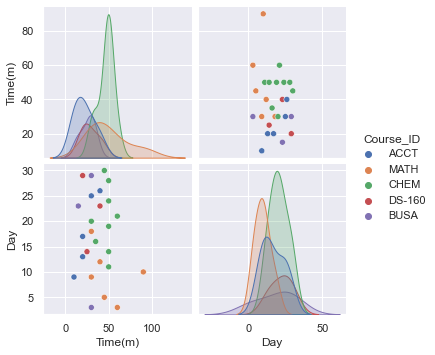

In [21]:
df.columns

Index(['Initials', 'Date', 'Course ID', 'Time (m)', 'Summary', 'Day',
       'Day_name'],
      dtype='object')

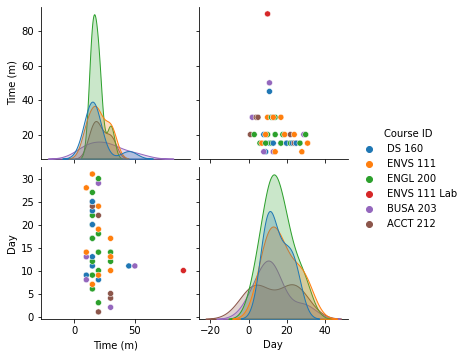

In [22]:
pair_plot=sns.pairplot(df[['Time (m)',
                       'Day', 'Course ID']],
                     hue='Course ID')

### Display the Heatmap and comment on your findings
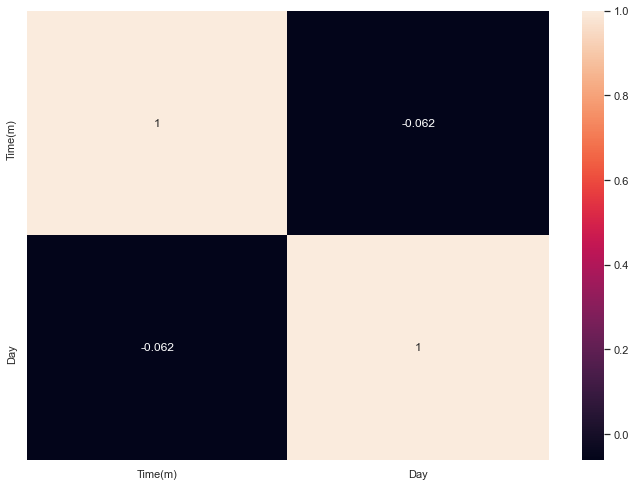

          Time (m)       Day
Time (m)  1.000000 -0.262437
Day      -0.262437  1.000000


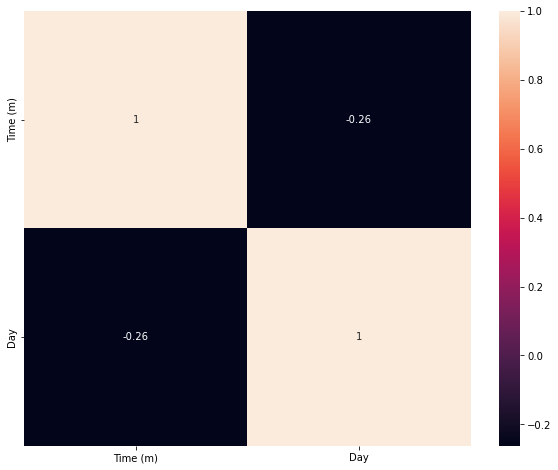

In [23]:
plt.figure(figsize=(10,8))

heat_map_corr=df[['Time (m)',
                        'Day']].corr(method='pearson')
print(heat_map_corr)
cols=['Time (m)', 'Day']

heat_map=sns.heatmap(heat_map_corr,
                     annot=True,
                    xticklabels=cols,
                    yticklabels=cols)

In [24]:
# The amount of time I spent on assignments per day is negatively correlated and not very high, meaning the day didn't affect the amount of time spent